In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import kagglehub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [13]:
path = kagglehub.dataset_download("rkiattisak/salaly-prediction-for-beginer")
print("Files:", os.listdir(path))
df = pd.read_csv(os.path.join(path,"Salary Data.csv"))
df.head()

Files: ['Salary Data.csv']


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


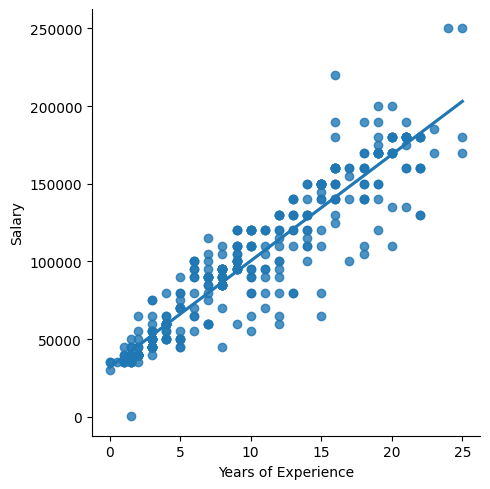

In [14]:
df_binary = df[["Years of Experience","Salary"]]
sns.lmplot(x="Years of Experience",y="Salary", data=df_binary,order=1,ci=None)
plt.show()

In [ ]:
df.fillna(method="ffill",inplace=True)

df["Gender"] = df["Gender"].map({"Male":0,"Female":1})
df["Education Level"] = df["Education Level"].map({"Bachelor's":0,"Master's":1, "PhD":2})

df = pd.get_dummies(df,columns=["Job Title"],drop_first=True)

X = df.drop("Salary",axis=1)
Y = df["Salary"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

regr = LinearRegression()

regr.fit(X_train,Y_train)
print(regr.score(X_test,Y_test))

0.8516221930140844


C:\Users\USER\AppData\Local\Temp\ipykernel_19636\2550641170.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill",inplace=True)


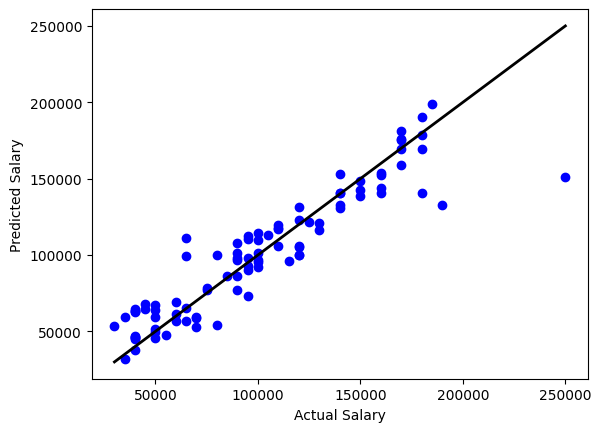

In [16]:
y_pred = regr.predict(X_test)
plt.scatter(Y_test,y_pred,color="b")
plt.plot([Y_test.min(),Y_test.max()],
         [Y_test.min(),Y_test.max()],
         color="k", lw=2)

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

In [17]:
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred)

mse = mean_squared_error(y_true=Y_test,y_pred=y_pred)
rmse = np.sqrt(mse)


print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 12410.232375814327
MSE: 333255614.11494875
RMSE: 18255.29003097318
